# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, I will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

I will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, I will monitor and check my data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, I will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Intruduction : https://youtu.be/7ELdizoi6BU



Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (Streamlit) as well as the theory behind algorithms*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, I need to analyze and recognize my data well in order to draw a roadmap and choose the correct arguments I will use. Accordingly, I will examine the frequency distributions of variables. I will observe variable correlations and want to explore multicollinearity. I will display the distribution of the target variable's classes over other variables. 


After these procedures, I will move on to the model building stage by doing the basic data pre-processing.

I will start with Logistic Regression and evaluate model performance.After that I will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, I will use four different algorithms in the model building phase. 

 



---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 





---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52143,45293.000,-0.593,0.960,1.993,-0.375,0.029,-1.160,0.845,-0.162,-0.657,-0.809,-0.006,0.532,0.787,-0.044,0.362,0.364,-0.571,-0.657,-0.801,-0.054,-0.193,-0.652,-0.107,0.710,0.278,-0.009,-0.077,-0.022,1.980,0
165110,117207.000,2.058,-0.046,-1.071,0.413,-0.122,-1.199,0.201,-0.345,0.514,0.067,-0.724,0.533,0.255,0.238,0.021,-0.109,-0.305,-0.887,0.150,-0.206,-0.287,-0.688,0.334,0.026,-0.291,0.196,-0.070,-0.059,4.490,0
183166,125682.000,1.968,-0.478,-0.431,-0.045,-0.525,-0.030,-0.729,0.220,1.197,-0.024,0.818,0.694,-0.919,0.319,0.172,0.413,-0.655,0.274,0.260,-0.250,-0.155,-0.397,0.439,0.651,-0.561,-0.330,-0.001,-0.042,0.770,0
184101,126091.000,-4.835,-2.791,-1.086,-1.527,1.205,1.593,1.877,-1.248,-0.249,2.163,1.462,0.142,0.941,-0.816,1.414,-2.671,0.207,-0.013,0.659,-3.026,-1.150,0.221,0.083,-0.760,0.728,1.200,-2.311,2.063,240.980,0
182785,125547.000,-0.192,0.739,0.593,0.792,0.505,-0.052,1.395,-0.353,-0.443,-0.124,-0.865,-1.343,-1.794,0.822,2.110,-1.734,0.742,0.404,2.863,0.413,0.096,0.390,-0.355,0.640,0.756,0.002,-0.103,-0.146,90.000,0
123042,76786.000,1.192,0.339,0.421,0.717,-0.317,-0.783,0.034,-0.102,-0.037,-0.335,0.496,0.581,0.438,-0.297,1.290,0.077,0.375,-0.890,-0.681,-0.106,-0.236,-0.631,0.196,0.368,0.110,0.103,-0.004,0.031,0.890,0
226543,144678.000,1.297,-2.406,-1.213,-0.803,-0.674,1.394,-0.762,0.422,0.048,0.538,0.730,-0.072,-0.921,0.018,-0.194,0.523,0.799,-2.297,0.259,0.588,0.096,-0.480,0.099,-1.676,-0.816,-0.498,-0.024,-0.007,389.720,0
280929,169843.000,1.959,-0.664,-0.583,0.387,-0.648,-0.133,-0.744,0.118,1.488,0.045,-1.480,-0.663,-1.504,0.082,0.560,0.438,-0.464,0.316,-0.178,-0.206,0.174,0.547,0.137,0.596,-0.244,0.592,-0.045,-0.042,39.130,0
86071,61070.000,-1.722,0.896,-0.275,-1.954,-0.968,0.986,0.901,-3.395,0.198,-0.785,0.644,0.454,-1.314,0.425,-1.497,0.544,-0.413,-0.630,-1.251,-1.546,2.939,-0.947,-1.128,-0.170,-0.833,1.080,0.621,-0.000,451.830,0
42446,41107.000,1.110,-0.072,0.055,0.510,-0.254,-0.541,0.131,-0.094,-0.198,0.117,1.038,0.638,-0.177,0.570,0.292,0.444,-0.711,0.314,0.192,0.051,0.071,0.029,-0.181,0.035,0.508,0.394,-0.061,0.008,78.100,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.isnull().sum().sum()

0

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [ ]:
!pip install deepchecks --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.6 MB 5.3 MB/s 
     |████████████████████████████████| 72 kB 763 kB/s 
     |████████████████████████████████| 11.2 MB 44.6 MB/s 
     |████████████████████████████████| 1.6 MB 44.3 MB/s 
     |████████████████████████████████| 965 kB 53.3 MB/s 
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8499 sha256=0f26481d7576be0f87a8e5eb807be8acb12aa01937410f87a61a2ba46099275d
  Stored in directory: /root/.cache/pip/wheels/42/29/a3/561def29f8cce748430b2557cbb7e2203116634ee055b29439
Successfully built PyNomaly
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from deepchecks.tabular.suites import data_integrity
suite = data_integrity()
result = suite.run(df)
result.show()

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

### Exploratory Data Analysis

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [ ]:
df['Class'].value_counts(normalize=True)

0   0.998
1   0.002
Name: Class, dtype: float64

In [ ]:
df.groupby(['Class'])['Time','Amount'].describe().T

Class                 0          1
Time   count 284315.000    492.000
       mean   94838.202  80746.807
       std    47484.016  47835.365
       min        0.000    406.000
       25%    54230.000  41241.500
       50%    84711.000  75568.500
       75%   139333.000 128483.000
       max   172792.000 170348.000
Amount count 284315.000    492.000
       mean      88.291    122.211
       std      250.105    256.683
       min        0.000      0.000
       25%        5.650      1.000
       50%       22.000      9.250
       75%       77.050    105.890
       max    25691.160   2125.870

In [ ]:
df.groupby(['Class'])['Amount'].sum()

Class
0   25102462.040
1      60127.970
Name: Amount, dtype: float64

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepchecks 0.9.2 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.


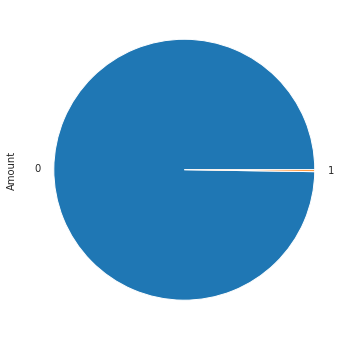

In [ ]:
df.groupby(['Class'])['Amount'].sum().plot(kind='pie')

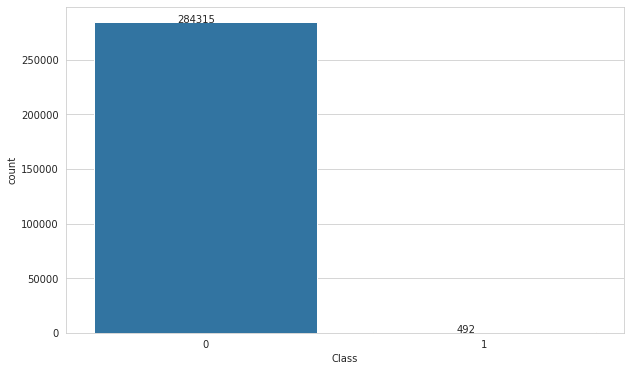

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df['Class'])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

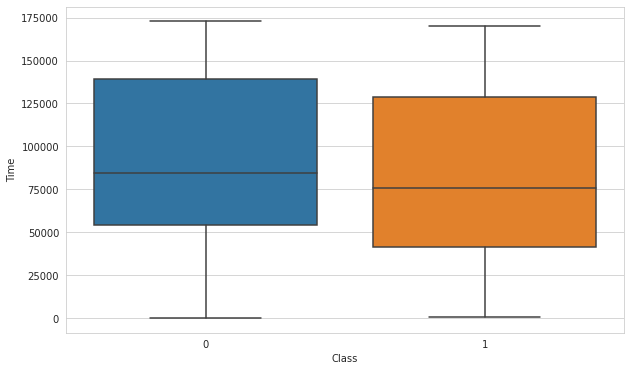

In [ ]:
sns.boxplot(x=df['Class'],y=df['Time']);

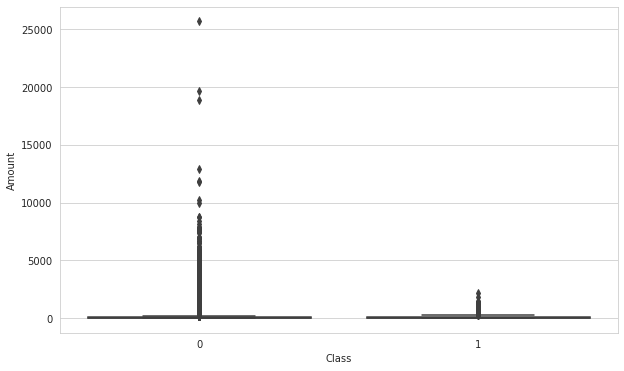

In [ ]:
sns.boxplot(x=df['Class'],y=df['Amount']);

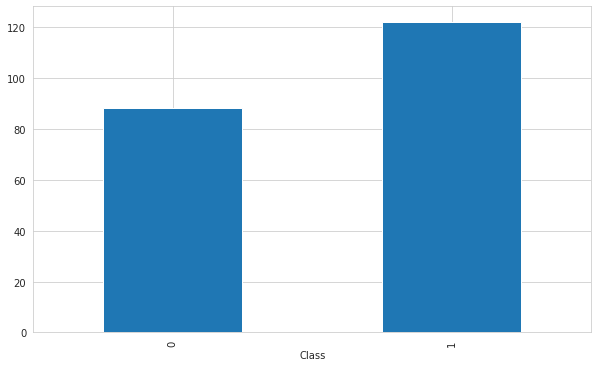

In [ ]:
df.groupby(['Class'])['Amount'].mean().plot(kind='bar');

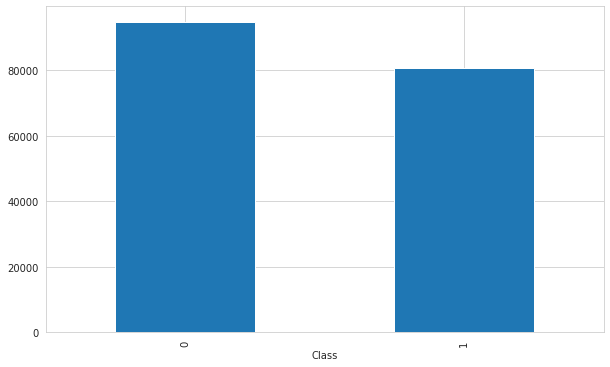

In [ ]:
df.groupby(['Class'])['Time'].mean().plot(kind='bar');

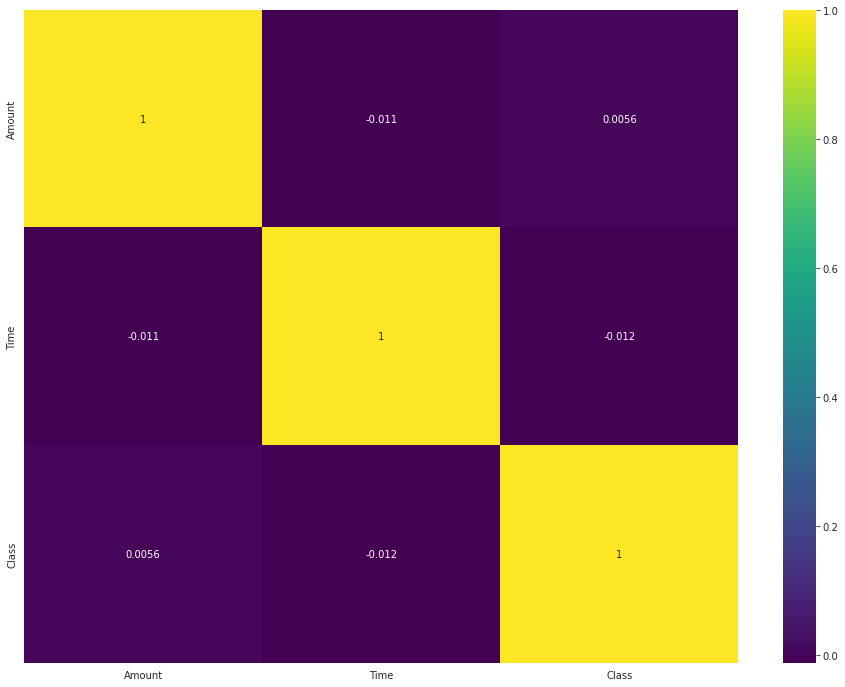

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[['Amount','Time','Class']].corr(), annot=True, cmap='viridis')

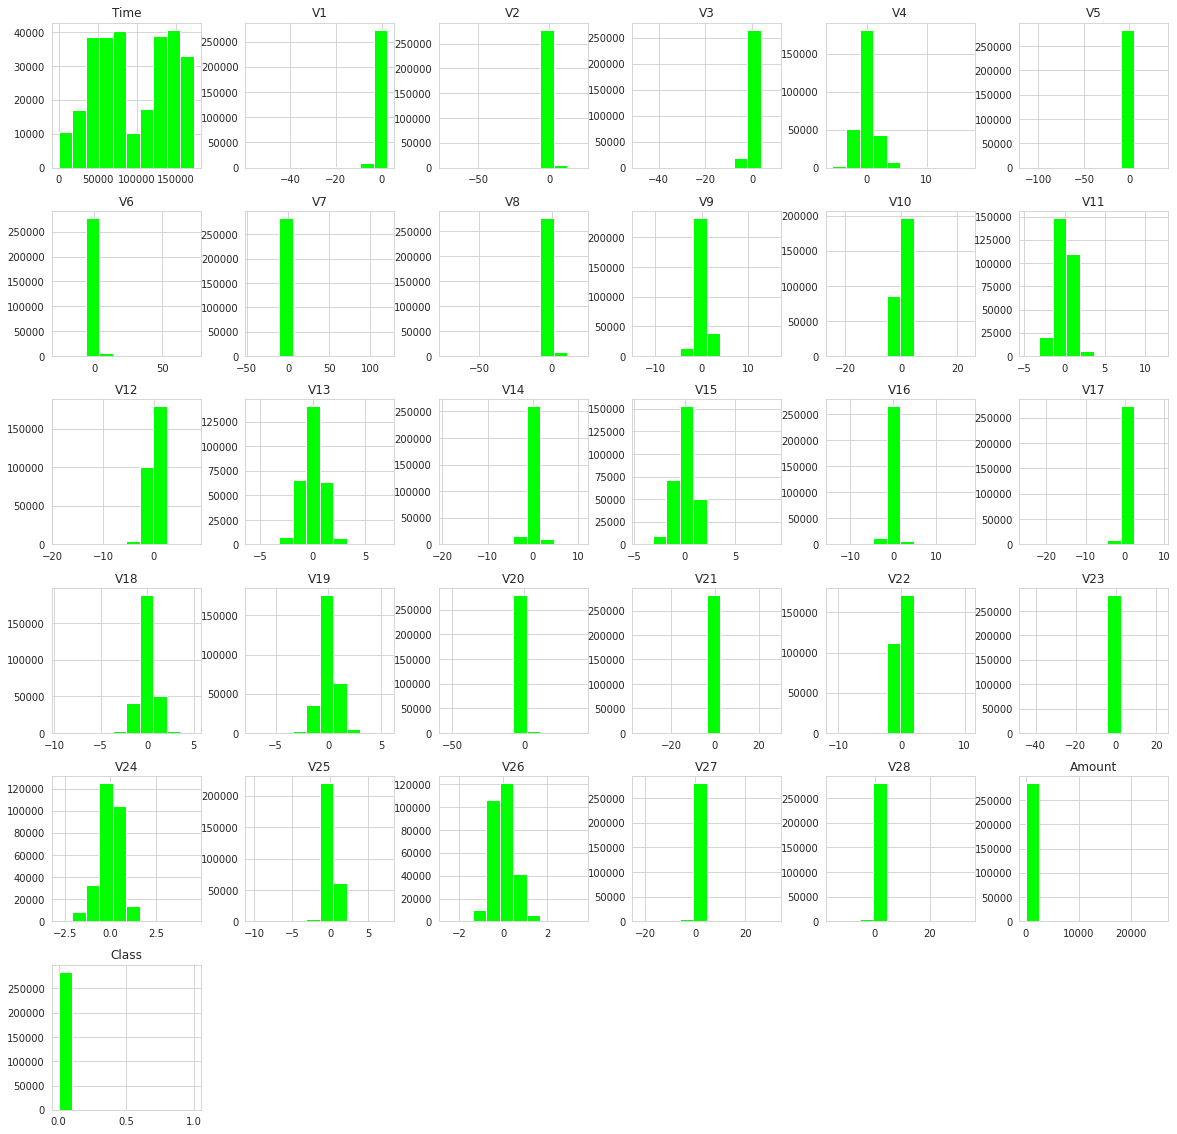

In [ ]:
df.hist(figsize=(20,20),color='lime');


In [ ]:
a,b=df.loc[df['Class']==1][['Time','Amount']]
c,d=df.loc[df['Class']==0][['Time','Amount']]

Text(0, 0.5, 'Amount')

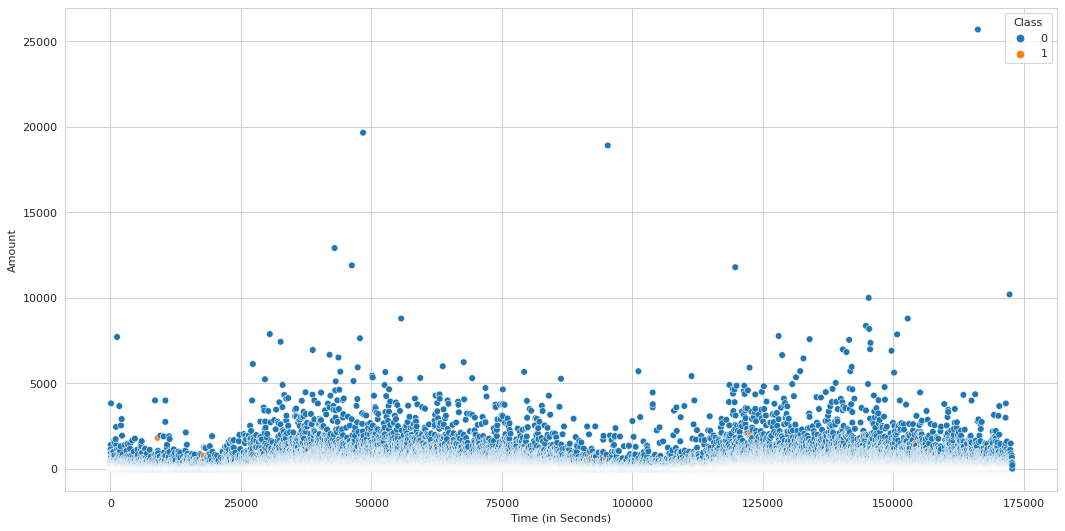

In [ ]:
plt.figure(figsize=(16, 8), dpi=80)
sns.scatterplot(df['Time'],df['Amount'],hue=df['Class'])
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')


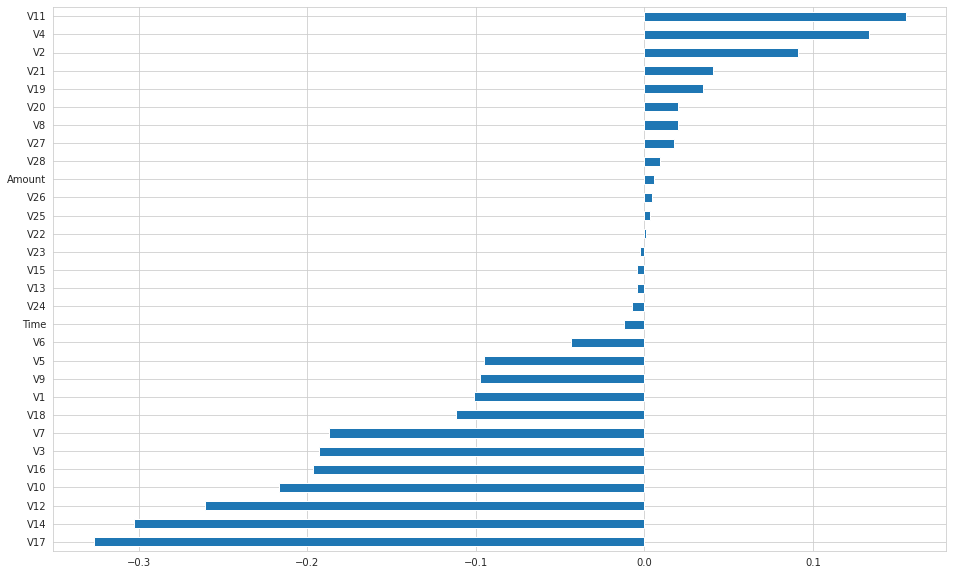

In [ ]:
plt.figure(figsize=(16,10))
df.corr()["Class"].drop("Class").sort_values().plot.barh()


### Data Cleaning
 Missing Values and Outliers

In [ ]:
df.drop_duplicates(inplace=True)

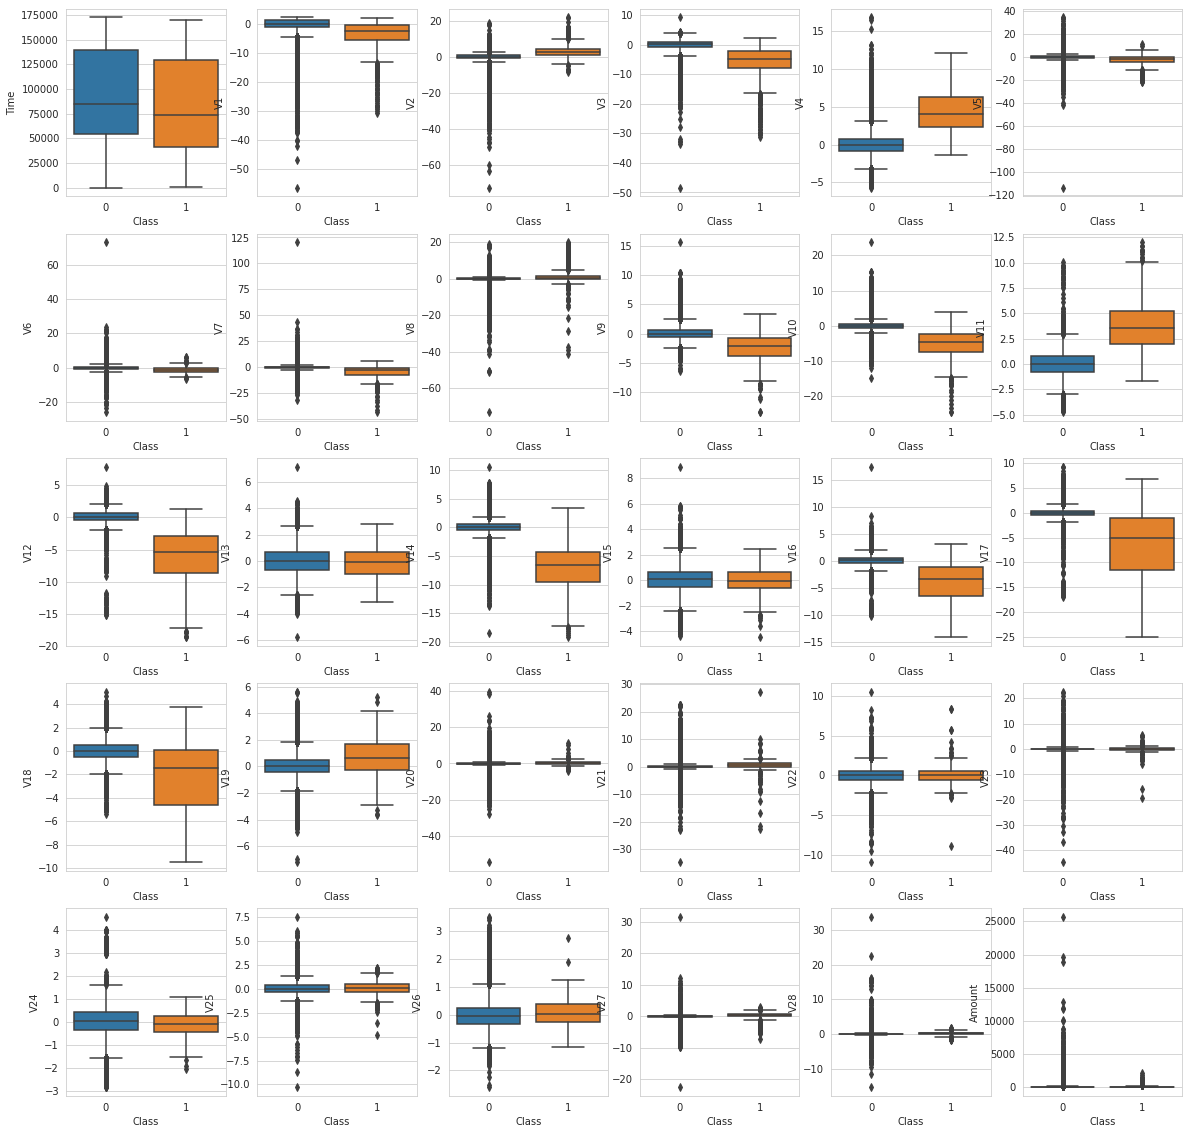

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(5,6,index)
        sns.boxplot(x='Class',y=feature,data=df)

---
---


## 2. Data Preprocessing

#### Train - Test Split


In [ ]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [ ]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(X_train, X_test)

suite_result

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuris

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Train Test Validation Suite

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---


## 3. Model Building


### Logistic Regression 

- The steps I am going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [ ]:
log_model=LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [ ]:
y_pred=log_model.predict(X_test_scaled)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
22163,32073.000,-0.807,1.265,1.186,1.263,-0.205,0.234,0.205,0.658,-0.756,-0.170,1.128,1.122,-0.116,0.522,-0.549,-0.965,0.616,-0.224,0.929,0.046,0.077,0.419,-0.070,0.237,-0.118,-0.251,0.299,0.135,17.310,0,0,0.001
48755,43773.000,1.083,-0.258,-0.417,0.954,0.536,1.120,-0.061,0.303,0.363,0.052,-0.633,-0.131,-1.372,0.471,-0.497,0.057,-0.528,0.278,0.556,-0.050,-0.131,-0.425,-0.344,-1.739,0.783,-0.226,0.009,-0.001,90.750,0,0,0.000
2678,2217.000,-3.030,2.217,0.636,-2.476,-0.646,-0.106,-0.144,-1.726,1.289,3.821,0.849,-0.336,-0.838,-1.406,-1.581,0.672,-0.078,-1.188,0.454,1.264,1.176,-0.492,0.011,-0.066,0.682,-0.386,1.105,0.339,0.990,0,0,0.000
222942,143186.000,-0.325,0.388,-1.079,0.445,0.435,0.030,3.540,-1.110,-0.547,0.104,-1.565,-1.328,-1.114,0.506,0.262,-0.513,-0.781,0.094,0.162,-0.064,0.132,0.840,-0.192,-0.769,-0.131,-0.482,-0.072,-0.362,405.000,0,0,0.001
54329,46395.000,1.222,0.239,0.729,0.750,-0.772,-1.306,0.050,-0.220,0.062,-0.056,0.201,0.358,-0.130,0.341,1.031,0.164,-0.209,-0.673,-0.317,-0.133,-0.226,-0.675,0.206,0.903,0.134,0.063,-0.031,0.024,1.980,0,0,0.000
89378,62551.000,1.079,-0.158,0.601,0.299,-0.731,-0.887,0.025,-0.231,0.153,-0.253,-0.035,0.870,1.287,-0.047,1.142,0.396,-0.486,-0.556,-0.075,0.185,-0.164,-0.643,0.064,0.437,0.080,0.399,-0.052,0.037,98.000,0,0,0.000
245800,152914.000,-0.823,0.546,-0.161,0.961,0.872,-0.041,1.914,-0.376,-1.178,-0.097,0.534,0.941,0.743,0.458,-0.986,-0.889,-0.239,0.135,1.231,0.001,0.165,0.698,-0.331,-0.330,0.336,-0.342,0.148,0.092,215.360,0,0,0.001
54515,46487.000,1.143,-0.151,0.610,0.790,-0.758,-0.666,-0.107,-0.077,0.632,-0.226,-0.741,0.171,-0.620,0.007,-0.058,-0.146,0.047,-0.667,0.245,-0.063,-0.284,-0.778,0.051,0.406,0.278,0.283,-0.036,0.022,49.990,0,0,0.000
103427,68650.000,0.859,-2.050,0.332,-1.149,-2.066,-0.705,-0.730,-0.087,-1.953,1.479,1.267,-0.720,-0.815,0.216,0.121,-0.033,0.376,0.406,-0.031,0.222,-0.218,-1.085,-0.029,0.461,-0.093,-0.539,-0.034,0.071,319.990,0,0,0.000
223184,143277.000,2.066,-1.210,-2.154,-2.810,-0.405,-1.341,0.079,-0.470,0.422,-0.271,0.830,1.548,0.938,0.543,0.276,-2.666,-0.149,1.623,0.662,-0.383,-0.146,0.144,-0.095,-0.439,0.362,-0.701,0.023,-0.055,98.560,0,0,0.000


In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56676     4]
 [   30    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56680
           1       0.90      0.55      0.68        66

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226537     36]
 [   160    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226573
           1       0.87      0.61      0.72       407

    accuracy                           1.00    226980
   macro avg       0.94      0.80      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,3.162,0.042,0.818,0.675,0.740,0.999
2,3.054,0.103,0.867,0.650,0.743,0.999
3,4.854,0.044,0.800,0.600,0.686,0.999
4,3.312,0.041,0.897,0.634,0.743,0.999
5,3.117,0.045,0.811,0.732,0.769,0.999
6,3.681,0.042,0.957,0.537,0.688,0.999
7,2.754,0.042,0.840,0.512,0.636,0.999
8,3.875,0.042,0.929,0.634,0.754,0.999
9,3.337,0.045,0.957,0.537,0.688,0.999
10,3.714,0.045,0.778,0.512,0.618,0.999


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

In [ ]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,3.702,0.046,0.818,0.675,0.740
2,3.107,0.038,0.867,0.650,0.743
3,3.415,0.043,0.800,0.600,0.686
4,3.485,0.042,0.897,0.634,0.743
5,2.732,0.041,0.811,0.732,0.769
6,5.648,0.039,0.957,0.537,0.688
7,3.105,0.040,0.840,0.512,0.636
8,3.508,0.041,0.929,0.634,0.754
9,3.581,0.045,0.957,0.537,0.688
10,3.598,0.039,0.778,0.512,0.618


In [ ]:
df_scores.mean()[2:]

test_precision_1   0.865
test_recall_1      0.602
test_f1_1          0.706
dtype: float64

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56676     4]
 [   30    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56680
           1       0.90      0.55      0.68        66

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226537     36]
 [   160    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226573
           1       0.87      0.61      0.72       407

    accuracy                           1.00    226980
   macro avg       0.94      0.80      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


model = LogisticRegression()
folds = KFold(n_splits=5, shuffle=True)

penalty = ["l1", "l2"]
C = np.logspace(-1, 3, 10)
class_weight= [None] 

solver = ["lbfgs", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=folds,
                          scoring = "recall",   
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.78255940e-01, 7.74263683e-01, 2.15443469e+00,
       5.99484250e+00, 1.66810054e+01, 4.64158883e+01, 1.29154967e+02,
       3.59381366e+02, 1.00000000e+03]),
                         'class_weight': [None], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [ ]:
grid_model.best_params_

{'C': 16.68100537200059,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56676     4]
 [   30    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56680
           1       0.90      0.55      0.68        66

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226536     37]
 [   160    247]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226573
           1       0.87      0.61      0.71       407

    accuracy                           1.00    226980
   macro avg       0.93      0.80      0.86    226980
weighted avg       1.00      1.00      1.00    226980





1.   Liste öğesi
2.   Liste öğesi


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

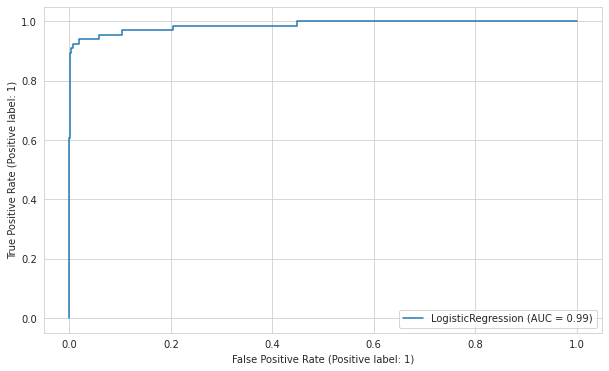

In [ ]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

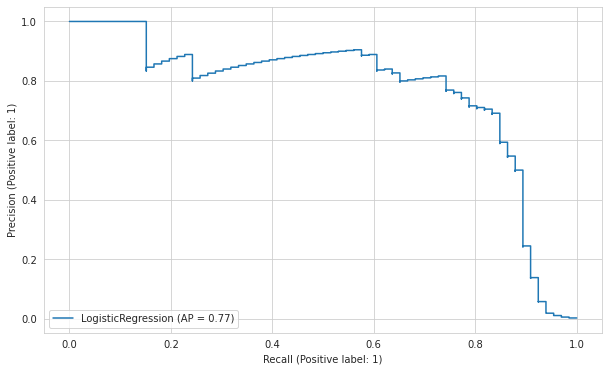

In [ ]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [ ]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, grid_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Logistic Regression with Unbalanced Data Techniques

- The steps I am going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Train-Test Split (Again)***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.20) 

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_1 = make_scorer(f1_score, pos_label =1)


In [ ]:
model = LogisticRegression()
folds = KFold(n_splits=10, shuffle=True)

penalty = ["l1", "l2"]
C = np.logspace(0, 2, 20)
class_weight= [{0:100,1:1}, {0:10,1:1}, {0:1,1:10}, {0:1,1:100},'balanced'] 

solver = ["lbfgs"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=folds,
                          scoring =f1_1,   
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 10}, {0: 1, 1: 100},
                                          'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['lbfgs']},
             scoring=make_scorer(f1_score, pos_label=1))

In [ ]:
grid_model.best_params_

{'C': 1.0, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l2', 'solver': 'lbfgs'}

***Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [ ]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56627    24]
 [   16    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.77      0.83      0.80        95

    accuracy                           1.00     56746
   macro avg       0.88      0.92      0.90     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226504     98]
 [    73    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.76      0.81      0.78       378

    accuracy                           1.00    226980
   macro avg       0.88      0.90      0.89    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
sample_pred=X.sample(10)
index=sample_pred.index
sample_pred=scaler.transform(sample_pred)
pred=grid_model.predict(sample_pred)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df.iloc[index]['Class']

165387    0
120952    0
12458     0
170215    0
118026    0
236159    0
92346     0
126300    0
110288    0
234082    0
Name: Class, dtype: int64

***iv.  Plot Precision and Recall Curve***


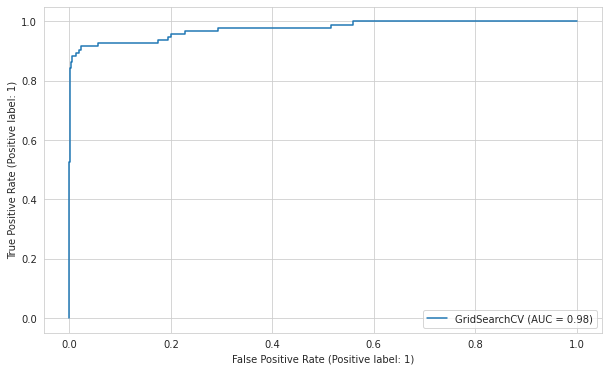

In [ ]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

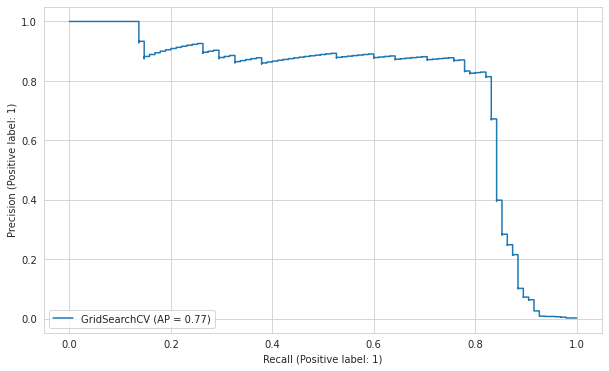

In [ ]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, grid_model)
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 17 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 17 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Random Forest Classifier with Unbalanced Data Techniques

- The steps I am going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

***i. Model Training***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)


Test_Set
[[56648     3]
 [   18    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.81      0.88        95

    accuracy                           1.00     56746
   macro avg       0.98      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602      0]
 [     1    377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=16,n_estimators=128,max_features=20)


In [ ]:
 rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16, max_features=20,
                       n_estimators=128)

In [ ]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)


Test_Set
[[56640    11]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.80      0.84        95

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226564     38]
 [     1    377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.91      1.00      0.95       378

    accuracy                           1.00    226980
   macro avg       0.95      1.00      0.98    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
folds = KFold(n_splits=10, shuffle=True)

scores = cross_validate(rf_model, X_train, y_train, scoring = ["precision_micro", "recall_micro", "f1_micro"], 
                        cv = folds)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

***iii. Plot Precision and Recall Curve***


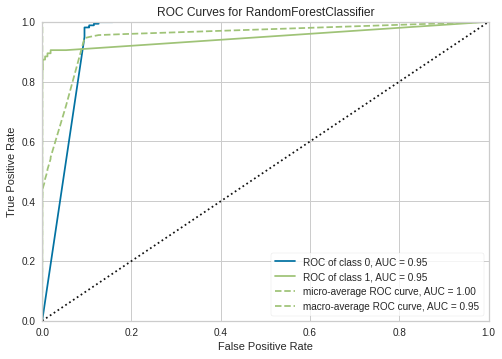

In [ ]:
from yellowbrick.classifier import ROCAUC

model = rf_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show();                       

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf_model)
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### XGBoost Classifier with Unbalanced Data Techniques

- The steps I am going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning*
   
   *iii. Plot Precision and Recall Curve*
   

In [ ]:
 !pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***i. Model Training***

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[56635     6]
 [   24    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.93      0.77      0.84       105

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226602     10]
 [    63    305]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       0.97      0.83      0.89       368

    accuracy                           1.00    226980
   macro avg       0.98      0.91      0.95    226980
weighted avg       1.00      1.00      1.00    226980



***ii. Prediction and Model Evaluating (Apply StratifiedKFold) and Tuning***

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=1, verbosity=1)

<function xgboost.sklearn.XGBModel.get_params(self, deep=False)>

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_1 = make_scorer(f1_score, pos_label =1)

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = KFold(n_splits=5, shuffle=True)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2], 
              "n_estimators":[80,100],
              'max_depth':[2,3],
             'subsample': [0.8],
              "colsample_bytree":[0.8]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= f1_1, 
                        cv = folds, 
                        verbose = 2,
                        n_jobs=-1
                        )      

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1, 0.2],
                         'max_depth': [2, 3], 'n_estimators': [80, 100],
                         'subsample': [0.8]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=2)

In [ ]:
model_cv.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
eval_metric(model_cv, X_train, y_train, X_test, y_test)

Test_Set
[[56637     4]
 [   25    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56641
           1       0.95      0.76      0.85       105

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226607      5]
 [    52    316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226612
           1       0.98      0.86      0.92       368

    accuracy                           1.00    226980
   macro avg       0.99      0.93      0.96    226980
weighted avg       1.00      1.00      1.00    226980



In [ ]:
sample_pred=X.sample(10)
index=sample_pred.index
pred=model_cv.predict(sample_pred)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df.iloc[index]['Class']

81253     0
84598     0
27332     0
229206    0
202612    0
38687     0
2382      0
141577    0
162443    0
116279    0
Name: Class, dtype: int64

***iii. Plot Precision and Recall Curve***


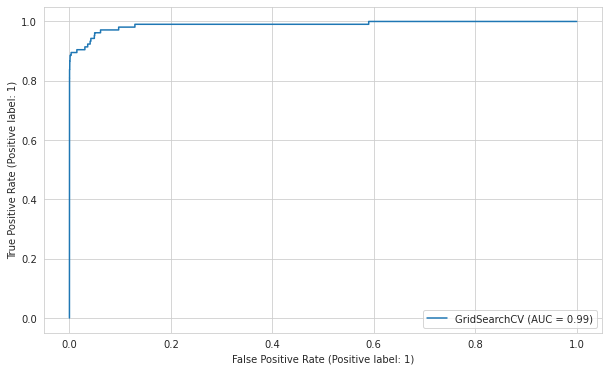

In [ ]:
plot_roc_curve(model_cv, X_test, y_test);

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model_cv)
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 43 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 43 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Neural Network

In the final step, I will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)
#In this part, we split X and y again in order to increase the training data

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape


((255353, 30), (28373, 30))

In [ ]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
229858,146081.000,-1.381,-2.468,-5.994,-1.257,-6.098,3.387,6.215,-4.780,-1.182,-0.018,0.690,-0.328,-0.246,0.791,-1.480,1.755,-0.315,-1.443,-0.322,-2.248,2.266,-0.028,-7.853,1.033,-1.780,-0.156,2.465,-0.241,2641.870,0
196494,131539.000,1.715,-1.328,-2.690,-0.157,-0.253,-1.697,0.841,-0.665,-0.950,0.953,-1.224,-1.032,-1.535,1.076,-0.133,-2.240,0.350,0.758,-0.817,-0.192,0.050,0.099,-0.307,0.032,0.334,0.999,-0.181,-0.048,283.980,0
52844,45674.000,1.238,0.265,0.179,0.503,-0.190,-0.568,-0.055,-0.010,-0.136,-0.100,1.257,0.574,-0.251,-0.021,0.467,0.793,-0.352,0.360,0.220,-0.090,-0.264,-0.815,0.082,-0.055,0.216,0.099,-0.030,0.016,0.890,0
14100,25089.000,-0.522,0.955,0.899,2.911,0.355,0.925,1.509,-0.070,-0.916,0.309,2.055,-2.272,1.926,2.152,-0.289,-0.411,0.744,0.361,0.690,0.535,0.144,0.327,0.297,-0.360,-0.192,0.224,0.044,0.140,221.180,0
20218,30868.000,1.223,0.333,0.284,1.126,-0.276,-0.960,0.236,-0.238,-0.024,0.009,-0.391,0.209,0.041,0.383,0.917,0.050,-0.430,-0.153,-0.373,-0.119,0.034,0.123,-0.110,0.394,0.686,-0.329,0.012,0.022,15.360,0


***ii. Define Model***

In [ ]:
model = Sequential()

model.add(Dense(50, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(25, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))



***iii. Compile Model***

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

***iv. Fit Model***

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 100, verbose=1)


Epoch 1/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0119 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 2/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 3/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 4/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 5/100
3591/3591 [==============================] - 12s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 6/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 7/100
3591/3591 [==============================] - 11s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0025 -

In [ ]:
pd.DataFrame(model.history.history)


,loss,accuracy,val_loss,val_accuracy
0,0.012,0.999,0.003,0.999
1,0.003,0.999,0.003,0.999
2,0.003,0.999,0.003,0.999
3,0.003,0.999,0.003,0.999
4,0.002,0.999,0.003,0.999
...,...,...,...,...
95,0.000,1.000,0.004,1.000
96,0.000,1.000,0.004,1.000
97,0.000,1.000,0.005,1.000
98,0.000,1.000,0.006,0.999


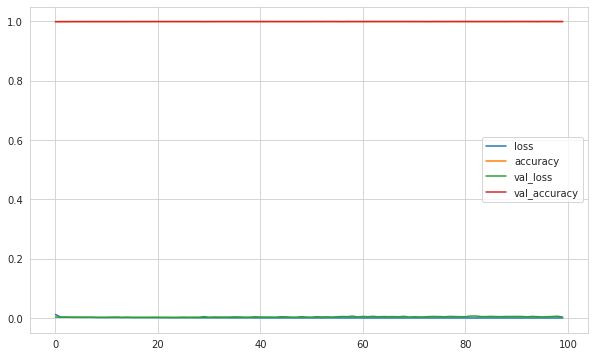

In [ ]:
pd.DataFrame(model.history.history).plot()


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

887/887 [==============================] - 1s 2ms/step
[[28320     6]
 [    8    39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.87      0.83      0.85        47

    accuracy                           1.00     28373
   macro avg       0.93      0.91      0.92     28373
weighted avg       1.00      1.00      1.00     28373



***v. Prediction and Model Evaluating***

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.0079735666513443
accuracy :  0.9995065927505493


In [ ]:
sample_pred=df.drop('Class',axis=1).sample(10)
index=sample_pred.index
sample_pred=scaler.transform(sample_pred)
(model.predict(sample_pred) > 0.5).astype("int32")




1/1 [==============================] - 0s 50ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
df.iloc[index]['Class']


36996     0
194503    0
197718    0
179448    0
23382     0
235632    0
134937    0
98228     0
173201    0
11830     0
Name: Class, dtype: int64

***vi. Plot Precision and Recall Curve***

887/887 [==============================] - 1s 2ms/step


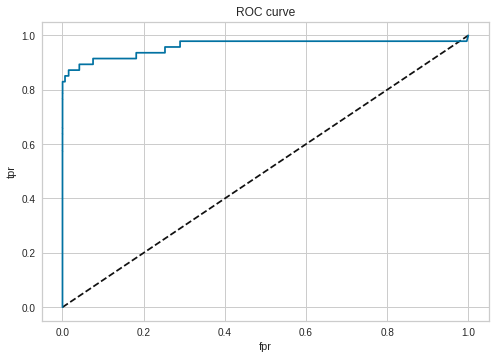

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()  

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.960393879166723

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10)


In [ ]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import model_evaluation
train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model)
suite_result.show()

887/887 [==============================] - 1s 2ms/step


1/1 [==============================] - 0s 18ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes


1/1 [==============================] - 0s 20ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 [==============================] - 0s 24ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


32/32 [==============================] - 0s 1ms/step


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite